# Time series analysis using the Fourier Transform for DInSAR
This analysis is based on https://github.com/MorcilloSanz/fourier-analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft

%matplotlib inline

Load the time series of 4 points of the same place for psi and EGMS

In [43]:
dates_psi = ["2016-12-05","2016-12-11","2016-12-17","2016-12-23","2016-12-29","2017-01-04","2017-01-10","2017-01-16","2017-01-22","2017-01-28","2017-02-03","2017-02-09","2017-02-15","2017-02-21","2017-02-27","2017-03-05","2017-03-11","2017-03-17","2017-03-23","2017-03-29","2017-04-04","2017-04-10","2017-04-16","2017-04-22","2017-04-28","2017-05-04","2017-05-10","2017-05-16","2017-05-22","2017-05-28","2017-06-03","2017-06-09","2017-06-15","2017-06-21","2017-06-27","2017-07-03","2017-07-09","2017-07-15","2017-07-21","2017-07-27","2017-08-02","2017-08-08","2017-08-14","2017-08-20","2017-09-01","2017-09-07","2017-09-13","2017-09-19","2017-09-25","2018-07-10","2018-07-16","2018-07-22","2018-07-28","2017-10-01","2018-08-03","2018-08-09","2017-10-07","2018-08-15","2018-08-21","2017-10-13","2018-08-27","2018-09-02","2018-09-08","2017-10-19","2018-09-14","2018-09-20","2017-10-25","2018-09-26","2018-10-02","2018-10-08","2017-10-31","2018-10-14","2018-10-20","2017-11-06","2018-10-26","2018-11-01","2017-11-12","2018-11-07","2018-11-13","2017-11-18","2018-11-19","2018-11-25","2017-11-24","2018-12-01","2018-12-07","2017-11-30","2018-12-13","2018-12-19","2017-12-06","2018-12-25","2017-12-12","2018-12-31","2017-12-18","2019-01-06","2019-01-12","2017-12-24","2019-01-18","2019-01-24","2019-01-30","2017-12-30","2019-02-05","2019-02-11","2018-01-05","2019-02-17","2019-02-23","2018-01-11","2019-03-01","2019-03-07","2019-03-13","2018-01-17","2019-03-19","2019-03-25","2019-03-31","2018-01-23","2019-04-06","2019-04-12","2018-01-29","2019-04-24","2019-04-30","2019-05-06","2019-05-12","2019-05-18","2019-05-24","2019-05-30","2019-06-05","2019-06-11","2019-06-17","2019-06-23","2018-02-04","2018-02-10","2018-02-16","2018-02-22","2018-02-28","2018-03-06","2018-03-12","2018-03-18","2018-03-24","2018-03-30","2018-04-05","2018-04-11","2018-04-17","2018-04-23","2018-04-29","2018-05-05","2018-05-17","2018-05-23","2018-05-29","2018-06-04","2018-06-10","2018-06-16","2018-06-22","2018-06-28","2018-07-04","2019-07-05","2019-07-11","2019-07-17","2019-07-23","2019-07-29","2019-08-04","2019-08-10","2019-08-16","2019-08-22","2019-08-28","2019-09-03","2019-09-09","2019-09-15","2019-09-21","2019-09-27","2019-10-03","2019-10-09","2019-10-15","2019-10-21","2019-10-27","2019-11-02","2019-11-08","2019-11-14","2019-11-20","2019-11-26"]
dates_egms = ["2019-01-07","2019-01-13","2019-01-19","2019-01-25","2019-01-31","2019-02-06","2019-02-12","2019-02-18","2019-02-24","2019-03-02","2019-03-08","2019-03-14","2019-03-20","2019-03-26","2019-04-01","2019-04-07","2019-04-13","2019-04-19","2019-04-25","2019-05-01","2019-05-07","2019-05-13","2019-05-19","2019-05-25","2019-05-31","2019-06-06","2019-06-12","2019-06-18","2019-06-24","2019-06-30","2019-07-06","2019-07-12","2019-07-18","2019-07-24","2019-07-30","2019-08-05","2019-08-11","2019-08-17","2019-08-23","2019-08-29","2019-09-04","2019-09-10","2019-09-16","2019-09-22","2019-09-28","2019-10-04","2019-10-10","2019-10-16","2019-10-22","2019-10-28","2019-11-03","2019-11-09","2019-11-15","2019-11-21","2019-11-27","2019-12-03","2019-12-09","2019-12-15","2019-12-21","2019-12-27","2020-01-02","2020-01-08","2020-01-14","2020-01-20","2020-01-26","2020-02-01","2020-02-07","2020-02-13","2020-02-19","2020-02-25","2020-03-02","2020-03-08","2020-03-14","2020-03-20","2020-03-26","2020-04-01","2020-04-07","2020-04-13","2020-04-19","2020-04-25","2020-05-01","2020-05-07","2020-05-13","2020-05-19","2020-05-25","2020-05-31","2020-06-06","2020-06-12","2020-06-18","2020-06-24","2020-06-30","2020-07-06","2020-07-12","2020-07-18","2020-07-24","2020-07-30","2020-08-05","2020-08-11","2020-08-17","2020-08-23","2020-08-29","2020-09-04","2020-09-10","2020-09-16","2020-09-22","2020-09-28","2020-10-04","2020-10-10","2020-10-16","2020-10-22","2020-10-28","2020-11-03","2020-11-09","2020-11-15","2020-11-21","2020-11-27","2020-12-03","2020-12-09","2020-12-15","2020-12-21","2020-12-27","2021-01-02","2021-01-08","2021-01-14","2021-01-20","2021-01-26","2021-02-01","2021-02-07","2021-02-13","2021-02-19","2021-02-25","2021-03-03","2021-03-09","2021-03-15","2021-03-21","2021-03-27","2021-04-02","2021-04-08","2021-04-14","2021-04-20","2021-04-26","2021-05-02","2021-05-08","2021-05-14","2021-05-20","2021-05-26","2021-06-01","2021-06-07","2021-06-13","2021-06-19","2021-06-25","2021-07-01","2021-07-07","2021-07-13","2021-07-19","2021-07-25","2021-07-31","2021-08-06","2021-08-12","2021-08-18","2021-08-24","2021-08-30","2021-09-05","2021-09-11","2021-09-17","2021-09-23","2021-09-29","2021-10-05","2021-10-11","2021-10-17","2021-10-23","2021-10-29","2021-11-04","2021-11-10","2021-11-16","2021-11-22","2021-11-28","2021-12-04","2021-12-10","2021-12-16","2021-12-22","2021-12-28","2022-01-03","2022-01-09","2022-01-15","2022-01-21","2022-01-27","2022-02-02","2022-02-08","2022-02-14","2022-02-20","2022-02-26","2022-03-04","2022-03-10","2022-03-16","2022-03-22","2022-03-28","2022-04-03","2022-04-09","2022-04-15","2022-04-21","2022-04-27","2022-05-03","2022-05-09","2022-05-15","2022-05-21","2022-05-27","2022-06-02","2022-06-08","2022-06-14","2022-06-20","2022-06-26","2022-07-02","2022-07-08","2022-07-14","2022-07-20","2022-07-26","2022-08-01","2022-08-07","2022-08-13","2022-08-19","2022-08-25","2022-08-31","2022-09-06","2022-09-12","2022-09-18","2022-09-24","2022-09-30","2022-10-06","2022-10-12","2022-10-18","2022-10-24","2022-10-30","2022-11-05","2022-11-11","2022-11-17","2022-11-23","2022-11-29","2022-12-05","2022-12-11","2022-12-17","2022-12-23","2022-12-29","2023-01-04","2023-01-10","2023-01-16","2023-01-22","2023-01-28","2023-02-03","2023-02-09","2023-02-15","2023-02-21","2023-02-27","2023-03-05","2023-03-11","2023-03-17","2023-03-23","2023-03-29","2023-04-04","2023-04-10","2023-04-16","2023-04-22","2023-04-28","2023-05-04","2023-05-10","2023-05-16","2023-05-22","2023-05-28","2023-06-03","2023-06-09","2023-06-15","2023-06-21","2023-06-27","2023-07-03","2023-07-09","2023-07-15","2023-07-21","2023-07-27","2023-08-02","2023-08-08","2023-08-14","2023-08-20","2023-08-26","2023-09-01","2023-09-07","2023-09-13","2023-09-19","2023-09-25","2023-10-01","2023-10-07","2023-10-13","2023-10-19","2023-10-25","2023-10-31","2023-11-06","2023-11-12","2023-11-18","2023-11-24","2023-11-30","2023-12-06","2023-12-12","2023-12-18"]

time_series_psi = [
    [0.6078009,2.983323,2.78068,2.528484,5.924143,5.781804,6.032865,-0.5466575,4.295974,0.3705931,6.782293,1.614131,10.57451,3.18897,10.50747,4.131234,0.5755606,3.21295,2.780361,4.903094,5.121568,4.370761,6.526925,8.584991,5.979403,0.7152441,9.399783,4.480115,4.047248,5.316231,-0.2403962,7.377448,11.74041,3.192653,6.886253,8.450715,0.503269,4.314516,6.969455,6.488576,10.56206,6.821069,9.830361,6.058037,6.09324,2.597478,4.396498,5.824347,4.101289,5.389913,7.813547,8.038361,4.19045,7.580259,2.572284,3.447225,2.953089,3.506335,0.1577949,2.100372,3.921513,-2.173506,2.873139,3.605781,-8.529623,4.45484,4.332901,6.844839,2.234259,3.073804,1.157598,1.163964,0.2338425,0.7302654,-5.766898,-3.591595,6.063612,9.878924,2.618439,1.588541,2.853273,2.330828,4.714352,4.017497,5.043327,4.344185,5.80364,4.152752,0.6824304,12.75453,11.68302,8.912754,-5.667881,-4.52969,4.427679,0.06562132,-2.517736,4.808235,0.6834413,-8.165947,-4.11178,-4.038743,1.019745,-4.145756,-4.236895,1.282454,4.547353,-5.537753,0.1156929,-1.874188,-13.28119,-14.93318,10.62509,9.657475,-9.459681,-2.999803,-9.95898,-11.4412,-11.76703,-9.86443,-7.206501,10.93664,-10.0964,-10.34227,-3.091003,-7.828071,-5.602089,-7.971921,-17.92057,-8.550504,-6.389066,-6.290206,-5.977592,-2.194313,-0.03216028,-11.13412,-3.800364,-5.55968,-1.941667,-0.1034705,-4.923664,-8.031129,-8.026835,-5.580319,-0.4202269,-4.455799,-2.957827,-2.9602,-4.000828,0.4284358,-4.592083,-2.238021,-6.972865,-6.70768,-1.602529,-5.075895,-4.31427,-2.409563,-6.239197,3.012403,-3.28841,-5.844786,-5.662731,-3.281028,-2.19868,-15.48995,-8.981426,-5.220395,-0.1765142,-3.039026,-3.190226,-10.15739,-4.775664,-7.024068,-7.717204,-6.889912,-8.897371,-13.792],
    [4.323316,6.376138,4.135465,-1.714184,-0.8157564,2.183269,-5.405683,-3.813797,4.382169,3.844771,2.130534,2.143633,6.514373,0.1847993,-1.894692,-0.1057831,-0.5061537,2.861117,2.196401,3.024542,-7.997545,2.919457,6.948936,0.7629474,1.491408,-1.330769,-4.16189,-3.095556,2.871281,-1.197242,3.825125,1.922134,5.814379,1.735566,2.175717,-1.201137,9.838905,0.9208265,11.30045,8.915311,3.52187,0.4422207,5.190026,4.374368,1.8018,3.356273,2.700177,4.282094,1.388553,2.635793,-3.258053,8.689839,3.320408,1.116184,5.382859,0.9232788,-2.656164,-2.656161,0.2096887,3.174182,-1.61605,-5.211997,1.172136,0.8005285,-2.492395,3.821405,-3.55845,-11.57742,-2.368569,-10.62643,-1.234307,-2.851104,-8.070812,-2.715002,-2.250967,-8.090468,-2.754268,-11.071,-4.293218,-6.367293,-0.6770675,-5.893305,-5.798187,-3.358217,-8.529401,-10.81717,-3.391707,-2.87601,-1.387364,0.2758428,-2.068194,-5.070106,3.125582,0.4046986,0.5884354,-0.3219351,-4.622176,-4.260859,0.6855926,-4.287438,10.84113,-7.734624],
    [-2.070824,0.295415,-0.08265131,-4.050168,0.7940754,0.3551424,0.9012135,-7.748966,0.05947505,-2.609191,-0.1582807,1.354561,-2.563804,-2.854841,2.420559,-3.785103,-3.63483,2.527321,-3.59022,0.9362085,1.725555,0.8976995,2.311111,9.0594,2.3034,0.6573223,4.419142,0.7934005,-0.4197752,-1.028938,-1.346781,-0.7114789,-2.41636,1.859951,2.467363,0.7549111,3.64237,4.779088,10.3047,6.127566,7.846282,10.32409,13.46424,6.635278,5.733966,6.194524,0.5330598,9.071094,1.646133,4.794618,5.595323,2.711151,-0.03378223,8.109315,7.948054,5.046016,3.303019,3.417722,-0.9288449,0.5320178,3.914633,-1.369774,1.224213,0.339563,-3.590495,2.347239,-2.593318,1.418883,-2.39624,-3.035115,-1.953096,-1.329332,-2.539971,-0.104269,-4.424933,-3.478001,2.814563,3.31928,0.8770713,-3.861981,5.870118,-5.777415,-1.083356,2.263325,-1.955016,0.5305141,1.640687,-1.76979,-0.9628021,-3.828015,-6.245191,1.247611,2.179222,-0.6265125,-0.855559,5.754924,5.056158,7.839627,1.874994,6.777084,0.3168955,0.3872285,2.347371,2.306897,2.624855,1.177724,-1.802623,-1.287107,1.957961,-1.658771,0.2376727,-7.707949,-3.528123,-2.072486,-3.626731,-1.781689,-4.758003,-4.549424,-5.698874,-5.785232,-4.019227,-0.919364,-1.901464,-1.607692,-2.465911,-3.063604,-4.924562,-3.981478,-9.485042,-3.95877,-6.095183,0.06483881,-3.259001,-0.7032225,-2.789577,-2.553767,-4.166507,-5.233354,-2.541084,0.9570408,-4.181144,-5.056668,-3.088657,-3.042306,-3.118191,-4.986241,-2.971576,-2.70684,-1.519825,-1.75959,2.384587,0.831559,1.178337,2.503424,-1.652634,-14.75469,-2.450747,-0.7667397,-4.573869,7.503935,2.039778,-4.35304,-3.181192,-0.5820388,3.109497,-6.503828,0.3161847,0.8719524,-0.5138864,-1.600893,2.246012,0.5122109,3.385316,-4.329176,-2.429212,-7.758878,-4.414321,-3.187397],
    [-2.596516,2.395209,-1.790043,1.161187,0.3035066,2.435138,3.046776,-3.607352,-1.809042,-1.81284,3.632731,0.05564842,2.786131,0.7655813,2.764018,-1.720424,-0.8173958,1.947337,-3.795719,4.116564,-1.607901,5.537521,1.41447,3.142434,2.570375,1.719604,5.272087,4.613451,5.775012,9.040742,-0.9186742,3.679444,8.143423,2.059861,1.603668,5.330307,-0.9767327,4.436131,6.870982,3.263349,8.291715,4.144548,0.6378329,6.37207,-0.2541431,0.3861836,4.7057,8.805779,-4.135692,1.40324,-0.15862,1.42514,0.980239,2.668515,0.4584379,1.141644,5.61025,0.9049599,-1.418343,3.659716,3.649328,-2.967807,0.1310709,-0.0920729,-3.265613,3.997983,1.431227,2.199062,-0.6339611,-0.1844949,-3.002688,3.032298,2.60439,1.549843,1.96796,-0.9190162,1.589806,3.958968,4.159958,-0.9964083,-0.1801756,-6.490011,-2.818131,2.786283,-2.236313,-0.6506458,4.314628,-0.8485602,2.213085,1.770162,-12.0889,2.878531,0.9020934,4.185504,8.039905,8.412046,-6.973106,1.112199,3.149966,-0.534411,-3.926499,-0.446041,0.4089017,-1.085662,-0.1176417,0.3065811,-6.05866,-0.6548761,-2.463388,-0.6457603,-1.818076,-6.299915,1.694951,-5.831815,-5.288096,-3.053506,0.06750613,-5.586298,-8.249868,-2.665176,-3.867391,0.362592,8.035988,-1.709226,-3.518197,-1.691438,-4.63034,-3.486415,-11.71301,1.138087,0.1226364,1.604954,-0.8826187,-3.375654,-2.008817,-0.5520255,1.833946,-5.371622,-3.123771,-1.496896,-0.2997927,-2.245291,2.010922,-7.261376,-0.608187,-2.266432,-4.885487,-3.565135,1.154268,0.6197509,1.535271,0.4851388,-2.535345,-4.877214,-1.835458,-4.468667,-2.703523,1.151922,-2.622884,1.723356,0.5303888,-2.643604,-0.08698748,-3.190813,-2.537895,-8.606647,-0.9800251,-2.5528,-3.517161,-2.116943,1.744347,-1.73503,-2.645644,-7.171699,-1.701271,-3.505494,-4.90202,-11.15847]    
]

dates_psi = dates_psi[:102]
for i in range(len(time_series_psi)):
    time_series_psi[i] = time_series_psi[i][:102]

time_series_egms = [
    [0.10000000,0.60000002,1.00000000,-0.50000000,2.20000005,3.00000000,0.80000001,2.40000010,1.79999995,-3.00000000,3.20000005,2.09999990,-2.59999990,-3.70000005,-2.00000000,0.40000001,1.79999995,0.69999999,-2.79999995,1.00000000,-2.70000005,-0.80000001,-3.70000005,-2.90000010,-0.30000001,-1.29999995,-2.79999995,-1.70000005,-3.09999990,0.50000000,-2.20000005,-2.20000005,-5.00000000,-2.59999990,-1.79999995,-1.79999995,-1.39999998,0.40000001,-0.20000000,-2.70000005,-2.29999995,-0.30000001,-1.10000002,-0.80000001,-0.60000002,-1.70000005,-0.60000002,2.09999990,0.50000000,1.10000002,2.59999990,0.60000002,-0.30000001,-4.19999981,0.60000002,-0.50000000,1.10000002,1.60000002,3.70000005,3.70000005,2.70000005,2.29999995,1.89999998,1.79999995,1.60000002,2.50000000,-1.60000002,-0.80000001,3.50000000,2.59999990,4.09999990,-0.40000001,-0.20000000,0.50000000,-4.90000010,-0.69999999,5.00000000,-12.39999962,2.59999990,2.59999990,5.09999990,4.80000019,1.79999995,-0.89999998,1.60000002,4.00000000,-1.60000002,-0.80000001,-0.50000000,0.69999999,0.40000001,0.40000001,-2.59999990,1.20000005,-0.30000001,0.69999999,1.00000000,-1.50000000,-1.70000005,0.10000000,-0.50000000,-0.60000002,4.80000019,2.00000000,3.20000005,3.09999990,1.79999995,1.70000005,4.00000000,4.30000019,3.40000010,4.50000000,1.79999995,2.90000010,3.20000005,3.79999995,1.79999995,1.70000005,3.20000005,2.20000005,6.19999981,8.50000000,6.80000019,1.79999995,1.10000002,2.00000000,-1.79999995,-0.20000000,-0.69999999,0.60000002,0.60000002,4.19999981,1.10000002,0.50000000,-10.10000038,2.40000010,2.59999990,0.10000000,-0.80000001,-0.89999998,2.09999990,2.00000000,-1.20000005,-3.40000010,-2.29999995,1.39999998,-1.79999995,0.20000000,-0.20000000,1.39999998,-2.90000010,3.20000005,-0.60000002,-3.00000000,-1.39999998,-1.20000005,-3.09999990,-2.09999990,-1.20000005,-0.20000000,-2.79999995,-0.20000000,2.29999995,0.80000001,2.20000005,0.00000000,2.50000000,-1.29999995,1.89999998,-1.29999995,0.00000000,-0.20000000,0.00000000,1.60000002,-1.10000002,0.20000000,0.20000000,0.80000001,1.00000000,0.40000001,-1.20000005,1.79999995,0.00000000,1.20000005,-1.39999998,0.20000000,-2.50000000,-0.50000000,3.00000000,-0.30000001,1.00000000,-1.70000005,-0.80000001,-1.10000002,-1.89999998,-4.30000019,-2.70000005,-1.39999998,-3.59999990,-3.00000000,-1.50000000,-3.29999995,-4.19999981,-2.29999995,-3.20000005,-1.60000002,-3.29999995,-1.20000005,-2.70000005,-2.40000010,-0.50000000,-1.79999995,-2.70000005,-2.29999995,-3.29999995,-3.79999995,-2.79999995,-4.40000010,-4.40000010,-3.79999995,-2.79999995,-4.69999981,-5.30000019,-5.00000000,-9.19999981,-4.80000019,-7.30000019,-5.00000000,-7.30000019,-5.69999981,-5.80000019,-7.00000000,-3.70000005,-5.69999981,-6.30000019,-5.40000010,-7.69999981,-3.90000010,-5.40000010,-6.00000000,-6.80000019],
    [-0.10000000,-0.60000002,-0.20000000,-0.20000000,0.80000001,1.70000005,0.40000001,-0.50000000,0.20000000,-0.60000002,2.09999990,-1.20000005,-0.60000002,-1.00000000,-1.60000002,-2.00000000,-0.20000000,0.69999999,-2.59999990,1.60000002,-1.10000002,-1.60000002,0.00000000,-2.29999995,-2.20000005,-1.20000005,-2.20000005,-0.89999998,-0.69999999,0.69999999,-0.50000000,-0.40000001,-0.50000000,-1.00000000,1.39999998,0.50000000,-0.30000001,0.00000000,0.89999998,-0.40000001,-2.70000005,5.50000000,2.40000010,0.40000001,1.60000002,1.60000002,0.89999998,3.20000005,2.09999990,5.30000019,8.30000019,2.59999990,2.59999990,4.09999990,4.09999990,3.90000010,6.30000019,1.79999995,-1.00000000,0.80000001,1.70000005,3.09999990,1.60000002,2.29999995,3.59999990,2.50000000,3.90000010,3.20000005,3.79999995,3.50000000,4.19999981,3.29999995,3.70000005,0.20000000,4.80000019,4.90000010,3.40000010,3.20000005,4.09999990,3.40000010,1.00000000,3.79999995,3.40000010,0.80000001,4.80000019,3.70000005,5.30000019,3.59999990,0.80000001,1.50000000,-1.70000005,-1.29999995,4.50000000,3.09999990,-0.89999998,0.89999998,0.89999998,4.59999990,2.09999990,1.29999995,0.20000000,5.59999990,2.50000000,3.79999995,6.00000000,4.50000000,4.30000019,-0.50000000,5.19999981,2.50000000,4.69999981,0.20000000,5.80000019,3.09999990,4.19999981,5.59999990,1.79999995,0.60000002,4.69999981,3.79999995,2.09999990,4.69999981,2.29999995,2.90000010,3.59999990,2.20000005,5.00000000,1.79999995,4.50000000,1.50000000,0.20000000,5.90000010,3.20000005,4.40000010,3.50000000,3.79999995,2.00000000,5.59999990,-1.20000005,4.09999990,3.50000000,3.70000005,0.69999999,1.79999995,3.20000005,6.69999981,2.40000010,4.69999981,4.59999990,1.79999995,1.29999995,1.29999995,1.50000000,-1.79999995,3.40000010,-1.20000005,-3.79999995,-2.20000005,-1.50000000,-0.50000000,3.40000010,5.40000010,2.70000005,5.80000019,2.70000005,4.80000019,2.29999995,4.19999981,1.89999998,4.00000000,1.70000005,0.60000002,2.20000005,0.20000000,4.69999981,4.59999990,5.50000000,3.40000010,3.09999990,1.29999995,3.70000005,2.90000010,3.29999995,3.09999990,2.59999990,2.70000005,2.09999990,0.40000001,4.30000019,6.90000010,2.70000005,2.20000005,0.89999998,-1.70000005,0.10000000,1.10000002,1.00000000,1.29999995,-1.29999995,2.29999995,0.89999998,3.50000000,0.20000000,3.20000005,3.20000005,2.50000000,-0.20000000,3.50000000,1.70000005,1.29999995,-2.20000005,2.59999990,0.20000000,2.79999995,-2.59999990,5.00000000,-0.69999999,2.50000000,-1.00000000,4.50000000,1.79999995,-3.09999990,-1.89999998,-1.79999995,-3.00000000,-4.19999981,-8.19999981,-5.50000000,-6.09999990,-3.79999995,-4.90000010,-6.50000000,-4.00000000,-4.30000019,-1.29999995,-5.59999990,-4.50000000,-5.40000010,-3.59999990,-4.90000010,-6.5999999],
    [1.60000002,2.40000010,2.00000000,1.29999995,0.60000002,2.09999990,0.89999998,-0.50000000,1.39999998,1.70000005,1.00000000,0.40000001,-1.50000000,1.20000005,1.00000000,1.39999998,-0.20000000,-4.90000010,-9.00000000,0.60000002,1.79999995,5.69999981,4.69999981,3.29999995,4.40000010,3.70000005,1.70000005,1.29999995,2.79999995,3.79999995,3.79999995,4.50000000,0.89999998,2.90000010,1.79999995,4.90000010,4.00000000,2.40000010,5.19999981,5.59999990,6.69999981,0.89999998,1.50000000,0.80000001,6.09999990,5.59999990,3.29999995,3.70000005,0.20000000,2.70000005,3.90000010,1.70000005,-7.59999990,1.50000000,-1.10000002,-2.50000000,-1.10000002,-6.69999981,2.90000010,4.69999981,1.50000000,2.59999990,-5.09999990,3.09999990,-2.00000000,2.50000000,3.70000005,2.09999990,3.79999995,2.70000005,0.40000001,0.00000000,5.59999990,1.00000000,3.50000000,-6.69999981,-2.50000000,0.00000000,2.09999990,2.90000010,-10.19999981,3.59999990,3.29999995,3.70000005,1.70000005,3.90000010,2.50000000,3.29999995,4.59999990,5.90000010,4.30000019,5.09999990,4.59999990,4.80000019,3.29999995,5.50000000,4.69999981,6.19999981,7.59999990,5.00000000,6.19999981,4.50000000,-0.80000001,1.39999998,1.89999998,4.00000000,3.29999995,0.50000000,6.00000000,5.40000010,-1.20000005,4.00000000,4.50000000,0.10000000,3.09999990,1.50000000,2.00000000,-3.20000005,-0.89999998,-2.09999990,0.10000000,3.90000010,4.00000000,-3.59999990,2.79999995,-0.50000000,0.10000000,-1.10000002,2.50000000,1.70000005,1.20000005,2.90000010,1.89999998,2.09999990,-0.20000000,-0.69999999,0.10000000,1.00000000,-3.79999995,-0.50000000,0.40000001,1.79999995,2.00000000,2.79999995,3.79999995,3.50000000,2.29999995,4.30000019,1.50000000,1.29999995,2.59999990,3.20000005,4.80000019,8.10000038,3.59999990,4.90000010,4.50000000,8.80000019,8.89999962,-4.19999981,0.10000000,3.09999990,-1.50000000,1.89999998,1.20000005,0.40000001,2.00000000,1.29999995,-0.30000001,1.00000000,-1.10000002,-1.39999998,0.60000002,-0.89999998,-0.40000001,1.10000002,0.20000000,1.39999998,0.10000000,-2.00000000,-0.20000000,-1.60000002,0.10000000,3.20000005,-2.79999995,-1.20000005,-2.50000000,0.00000000,0.89999998,-6.59999990,0.50000000,2.90000010,2.59999990,6.50000000,2.90000010,2.50000000,2.40000010,2.09999990,2.00000000,5.69999981,3.79999995,0.60000002,-0.30000001,-2.40000010,0.10000000,-0.10000000,-6.00000000,-1.20000005,-4.50000000,-7.59999990,-6.40000010,-4.50000000,-1.10000002,-4.80000019,-3.79999995,-1.79999995,-4.69999981,-1.50000000,1.50000000,0.10000000,-0.69999999,0.60000002,-6.50000000,-3.59999990,-7.19999981,-1.70000005,5.50000000,2.00000000,-1.39999998,0.40000001,-4.30000019,-4.80000019,-6.50000000,-3.20000005,-8.30000019,-3.79999995,-6.50000000,-6.30000019,-0.60000002,-4.30000019,-5.59999990],
    [-1.70000005,-0.60000002,-0.60000002,-3.00000000,2.20000005,-1.20000005,1.00000000,0.50000000,2.00000000,0.20000000,-0.20000000,2.90000010,-0.30000001,-0.89999998,-2.79999995,-2.00000000,-0.10000000,-1.29999995,-5.50000000,-0.69999999,0.60000002,0.10000000,2.59999990,1.60000002,2.40000010,3.50000000,1.79999995,1.00000000,0.60000002,-3.00000000,-0.69999999,-1.10000002,0.20000000,1.70000005,1.29999995,1.70000005,-0.30000001,0.40000001,1.89999998,1.29999995,2.29999995,0.00000000,2.20000005,-1.20000005,-0.10000000,0.69999999,0.80000001,1.89999998,0.10000000,-0.10000000,1.70000005,1.39999998,-2.29999995,1.20000005,0.60000002,-0.69999999,-1.60000002,-2.40000010,1.10000002,1.79999995,2.00000000,4.00000000,0.40000001,-0.20000000,3.59999990,2.20000005,5.00000000,3.50000000,0.30000001,1.70000005,3.50000000,2.29999995,1.29999995,0.69999999,2.59999990,1.29999995,0.10000000,-0.10000000,1.20000005,0.60000002,-7.30000019,0.89999998,-1.10000002,0.89999998,2.20000005,5.00000000,4.00000000,2.29999995,1.70000005,0.80000001,2.70000005,2.79999995,2.90000010,1.10000002,3.20000005,2.59999990,-1.60000002,-0.50000000,1.60000002,-0.10000000,1.10000002,2.40000010,-1.79999995,0.20000000,2.09999990,1.79999995,2.09999990,3.20000005,3.20000005,1.20000005,4.69999981,2.09999990,0.00000000,0.80000001,1.29999995,-0.50000000,1.39999998,2.09999990,1.60000002,0.10000000,1.60000002,7.90000010,-1.29999995,3.90000010,0.20000000,0.60000002,-0.60000002,-0.80000001,-1.00000000,-1.00000000,-4.50000000,1.39999998,0.89999998,-3.00000000,-3.29999995,-0.80000001,1.20000005,0.00000000,-1.00000000,-2.00000000,0.30000001,6.50000000,-1.00000000,-1.10000002,-2.40000010,-1.20000005,-4.59999990,-0.20000000,-1.39999998,-1.39999998,1.29999995,0.00000000,2.09999990,1.39999998,1.00000000,1.10000002,2.00000000,2.50000000,2.59999990,1.70000005,1.10000002,-0.10000000,0.10000000,1.20000005,0.69999999,1.29999995,-0.40000001,2.29999995,-0.80000001,1.00000000,0.40000001,1.10000002,0.69999999,0.69999999,-0.30000001,-1.00000000,1.70000005,1.70000005,1.00000000,-0.40000001,-0.50000000,0.60000002,2.50000000,-0.69999999,-2.20000005,-0.80000001,2.29999995,-4.00000000,-3.59999990,8.50000000,-0.30000001,-1.29999995,0.40000001,3.59999990,0.69999999,-0.89999998,2.90000010,1.39999998,0.20000000,0.10000000,-1.39999998,-0.30000001,-1.89999998,-1.29999995,-1.50000000,-2.40000010,-3.79999995,-2.00000000,-1.10000002,-7.40000010,-2.70000005,-5.50000000,-2.00000000,-0.60000002,-3.50000000,-0.80000001,-4.59999990,-5.40000010,-4.50000000,-4.40000010,-9.00000000,-4.30000019,-2.09999990,-5.59999990,-4.09999990,-6.80000019,-5.40000010,-4.69999981,-2.79999995,-7.59999990,-7.40000010,-7.40000010,-7.50000000,-8.00000000,-6.19999981,-5.00000000,-7.19999981,-8.30000019,-9.10000038,-8.00000000,-10.19999981]
]

dates_egms = dates_egms[:241]

Since there is a missmatch between the dates, we need to adjust the time window for both time series

In [44]:
# Dataframes
dates_psi = pd.to_datetime(dates_psi)
dates_egms = pd.to_datetime(dates_egms)

df_psi = []
df_egms = []

for i in range(len(time_series_psi)):
    df_psi.append(pd.DataFrame(data=time_series_psi[i], index=dates_psi, columns=["displacement_mm"]))
    df_egms.append(pd.DataFrame(data=time_series_egms[i], index=dates_egms, columns=["displacement_mm"]))

# Filter dates
start_date = max(df_psi[0].index.min(), df_egms[0].index.min())
end_date = min(df_psi[0].index.max(), df_egms[0].index.max())
print(f"\nDates intersection: from {start_date} to {end_date}")

for i in range(len(df_psi)):
    df_psi[i] = df_psi[i][(df_psi[i].index >= start_date) & (df_psi[i].index <= end_date)]
    df_egms[i] = df_egms[i][(df_egms[i].index >= start_date) & (df_egms[i].index <= end_date)]


Dates intersection: from 2019-01-07 00:00:00 to 2019-02-11 00:00:00


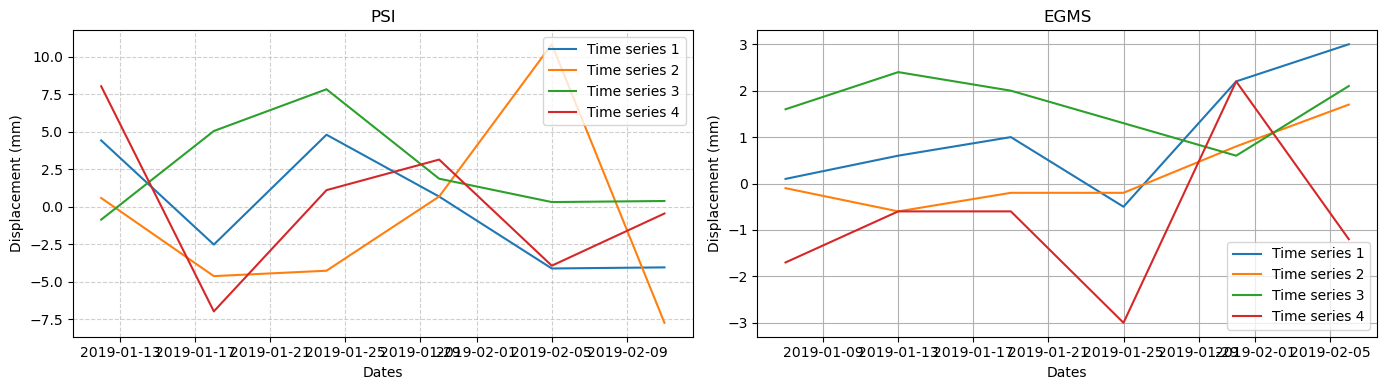

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for i, df in enumerate(df_psi):
    axes[0].plot(df.index, df["displacement_mm"], label=f"Time series {i + 1}")

axes[0].set_title('PSI')
axes[0].set_xlabel('Dates')
axes[0].set_ylabel('Displacement (mm)')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

for i, df in enumerate(df_egms):
    axes[1].plot(df.index, df["displacement_mm"], label=f"Time series {i + 1}")

axes[1].set_title('EGMS')
axes[1].set_xlabel('Dates')
axes[1].set_ylabel('Displacement (mm)')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.show()

For a better understading we will decompose the time series using the Fourier Transform

In [45]:
ft_psi = []
ft_egms = []

for i in range(len(df_psi)):

    f_psi = df_psi[i]["displacement_mm"]
    f_egms = df_egms[i]["displacement_mm"]

    ft_psi.append(fft(f_psi))
    ft_egms.append(fft(f_egms))

ft_psi = np.array(ft_psi)
ft_egms = np.array(ft_egms)

step_size = 4 / ft_psi.shape[1]  # Each step is 4 months
frequencies = fftfreq(ft_psi.shape[1], step_size)

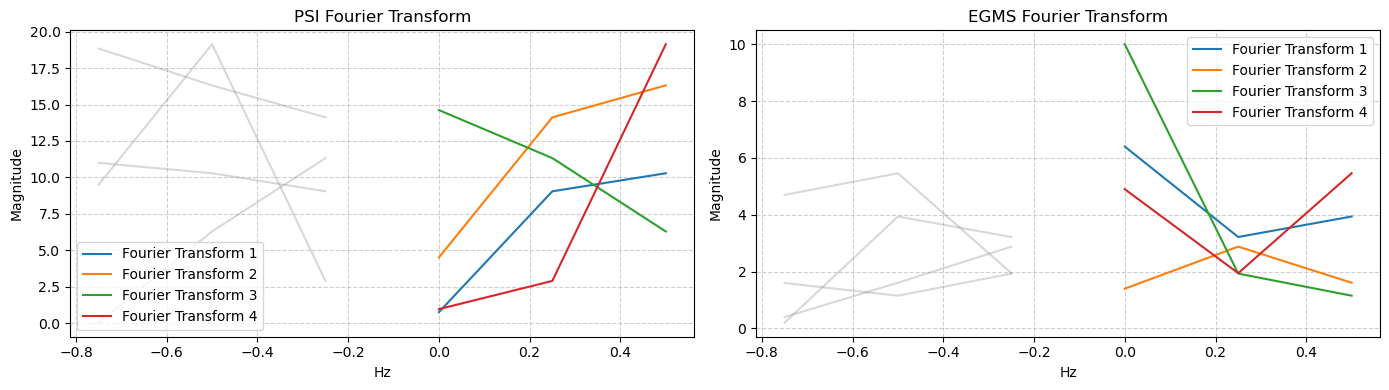

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for i, ft in enumerate(ft_psi):
    magnitude = np.abs(ft)
    axes[0].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label=f'Fourier Transform {i + 1}')
    axes[0].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3)

axes[0].set_title('PSI Fourier Transform')
axes[0].set_xlabel('Hz')
axes[0].set_ylabel('Magnitude')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

for i, ft in enumerate(ft_egms):
    magnitude = np.abs(ft)
    axes[1].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label=f'Fourier Transform {i + 1}')
    axes[1].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3)

axes[1].set_title('EGMS Fourier Transform')
axes[1].set_xlabel('Hz')
axes[1].set_ylabel('Magnitude')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()

Now, we can filter by intervals of frequencies for extracting trends

In [47]:
d_omega = 0.4
n_intervals = 7
intervals = []

for i in range(0, n_intervals-1):
    interval = (i * d_omega, (i + 1) * d_omega)
    intervals.append(interval)

intervals.append((intervals[-1][1], max(frequencies)))

colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'violet']

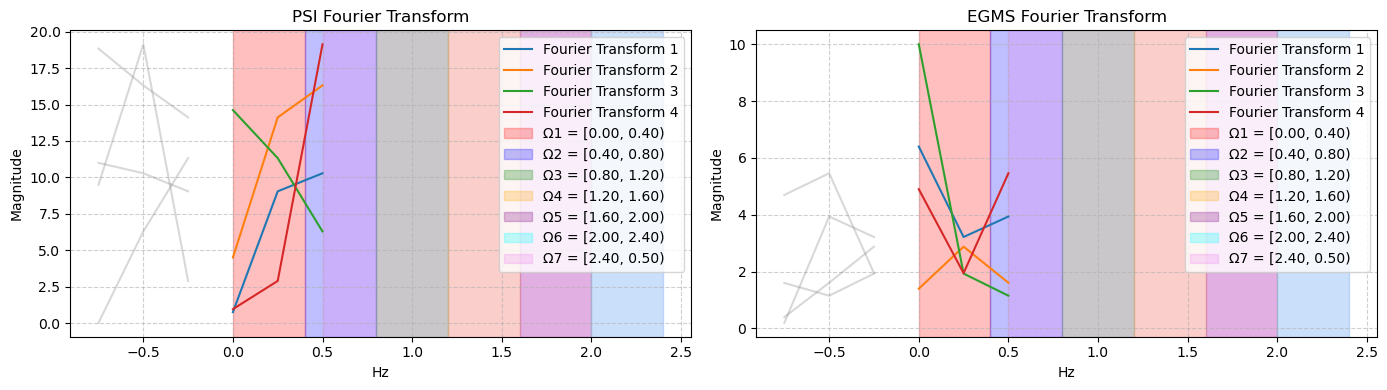

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

for i, ft in enumerate(ft_psi):
    magnitude = np.abs(ft)
    axes[0].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label=f'Fourier Transform {i + 1}')
    axes[0].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3)

for i, interval in enumerate(intervals):
    color = colors[i % len(colors)]
    axes[0].axvspan(interval[0], interval[1], alpha=0.25, color=color, label=f'Ω{i + 1} = [{interval[0]:.2f}, {interval[1]:.2f})')

axes[0].set_title('PSI Fourier Transform')
axes[0].set_xlabel('Hz')
axes[0].set_ylabel('Magnitude')
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].legend()

for i, ft in enumerate(ft_egms):
    magnitude = np.abs(ft)
    axes[1].plot(frequencies[frequencies >= 0], magnitude[frequencies >= 0], label=f'Fourier Transform {i + 1}')
    axes[1].plot(frequencies[frequencies < 0], magnitude[frequencies < 0], color='gray', alpha=0.3)

for i, interval in enumerate(intervals):
    color = colors[i % len(colors)]
    axes[1].axvspan(interval[0], interval[1], alpha=0.25, color=color, label=f'Ω{i + 1} = [{interval[0]:.2f}, {interval[1]:.2f})')

axes[1].set_title('EGMS Fourier Transform')
axes[1].set_xlabel('Hz')
axes[1].set_ylabel('Magnitude')
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].legend()

plt.tight_layout()
plt.show()

In [49]:
def filter(ft: np.array) -> tuple[list, list]:

    F_hat: list[np.array] = []
    psi: list[np.array] = []

    for low, high in intervals:

        F_hat_i = ft.copy()

        mask_i = (np.abs(frequencies) >= low) & (np.abs(frequencies) < high)
        F_hat_i[~mask_i] = 0
        psi_i = ifft(F_hat_i).real

        F_hat.append(F_hat_i)
        psi.append(psi_i)

    F_hat = np.array(F_hat)
    psi = np.array(psi)

    return F_hat, psi


F_hat_psi = []
psi_psi = []

for ft in ft_psi:
    F_hat_psi_i, psi_psi_i = filter(ft)
    F_hat_psi.append(F_hat_psi_i)
    psi_psi.append(psi_psi_i)

F_hat_egms = []
psi_egms = []

for ft in ft_egms:
    F_hat_egms_i, psi_egms_i = filter(ft)
    F_hat_egms.append(F_hat_egms_i)
    psi_egms.append(psi_egms_i)


In [50]:
def plot_filtered_superposed(F_hat_list, psi_list, title="") -> None:

    n_psi = len(F_hat_list)
    n_components = F_hat_list[0].shape[0]

    # Scales
    max_F = max(np.max(np.abs(F_hat)) for F_hat in F_hat_list)
    max_psi = max(np.max(np.abs(psi)) for psi in psi_list)

    fig, axes = plt.subplots(2, n_components, figsize=(4 * n_components, 8))
    fig.suptitle(title, fontsize=16)

    for k in range(n_components):

        # F_hat
        axF = axes[0, k]
        axF.set_title(f"Filtered Fourier Transform F_hat_{k+1}")
        axF.set_ylim(0, max_F)
        axF.grid(True, linestyle='--', alpha=0.6)

        pos = frequencies >= 0
        neg = frequencies < 0

        for i in range(n_psi):
            axF.plot(
                frequencies[pos],
                np.abs(F_hat_list[i][k, pos]),
                label=f"psi {i+1}"
            )

        axF.legend(fontsize=8)
        axF.set_xlabel("Frequency (Hz)")
        axF.set_ylabel(f"|F_hat_{k+1}|")
        axF.xaxis.set_major_locator(plt.MaxNLocator(5))
        plt.setp(axF.get_xticklabels(), rotation=45, ha="right")

        # psi(t)
        axT = axes[1, k]
        axT.set_title(f"Inverse Transform psi_{k+1}")
        axT.set_ylim(-max_psi, max_psi)
        axT.grid(True, linestyle='--', alpha=0.6)

        for i in range(n_psi):
            axT.plot(
                df_psi[0].index,
                psi_list[i][k],
                label=f"psi {i+1}"
            )

        axT.legend(fontsize=8)
        axT.set_xlabel("Time (t)")
        axT.set_ylabel(f"psi_{k+1}(t)")
        axT.xaxis.set_major_locator(plt.MaxNLocator(5))
        plt.setp(axT.get_xticklabels(), rotation=45, ha="right")

    plt.tight_layout()
    plt.show()


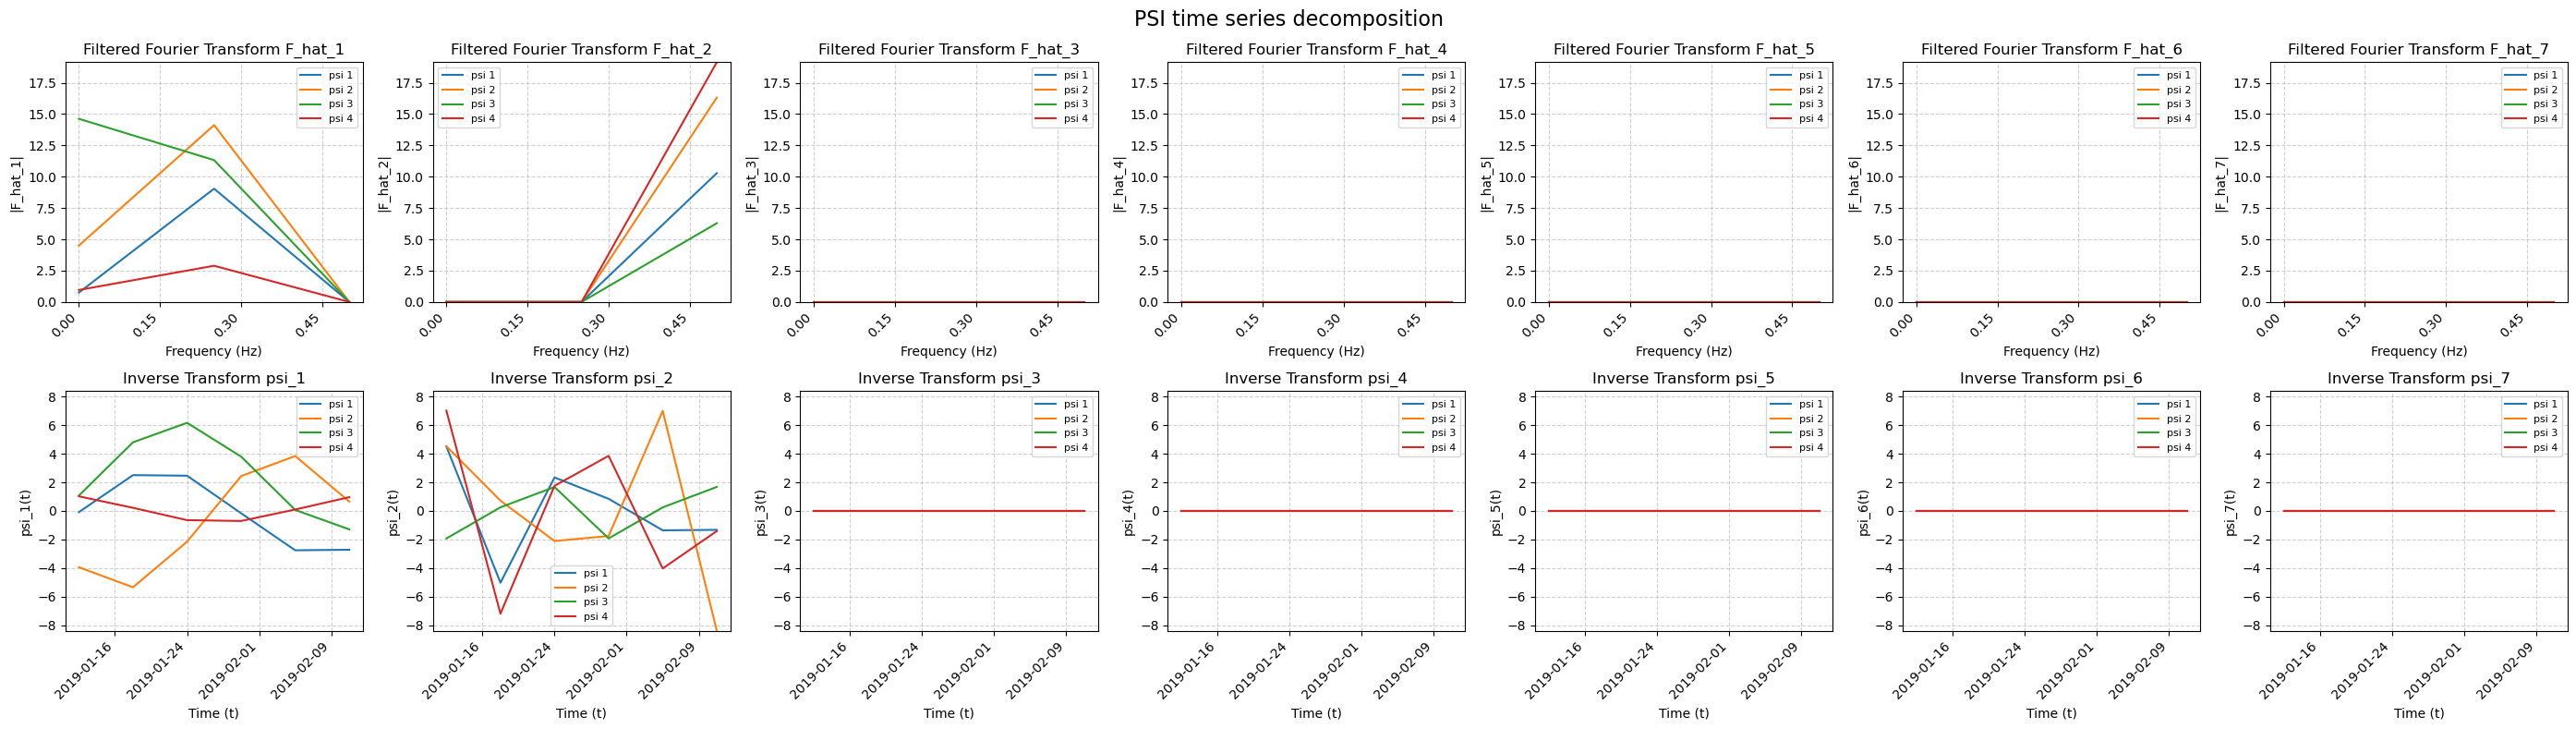

In [51]:
plot_filtered_superposed(F_hat_psi, psi_psi, "PSI time series decomposition")

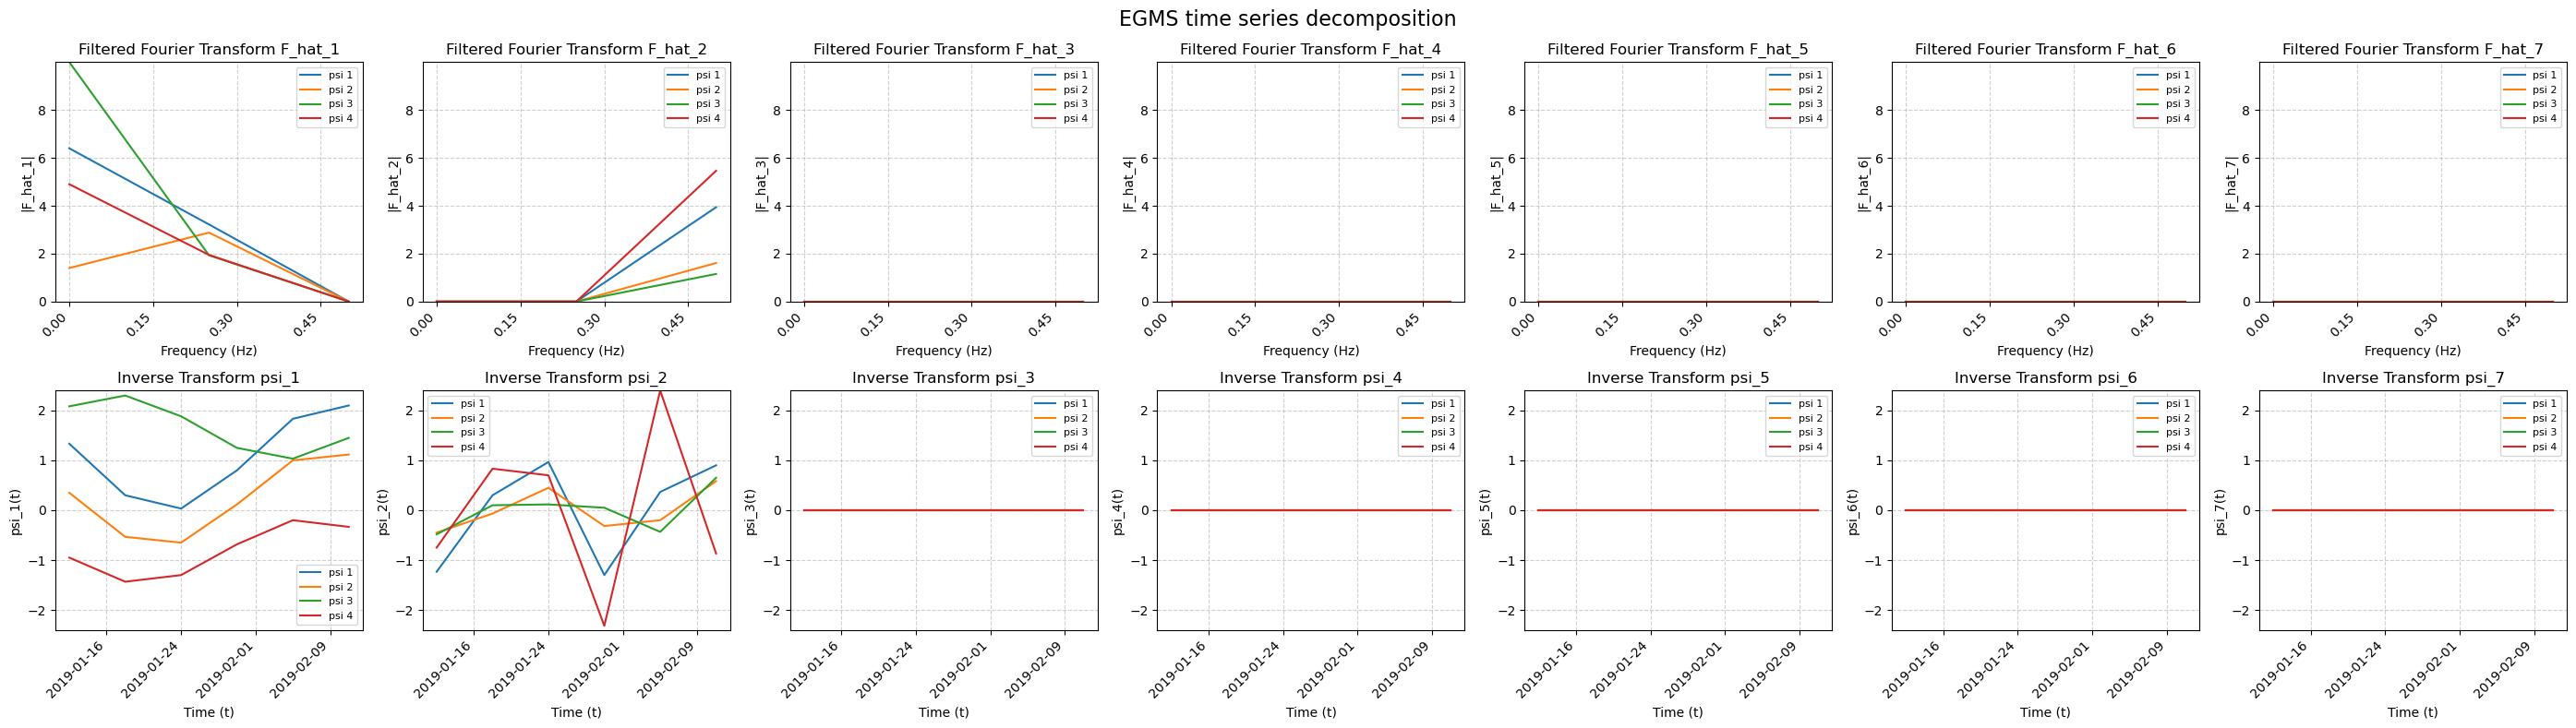

In [52]:
plot_filtered_superposed(F_hat_egms, psi_egms, "EGMS time series decomposition")

We can see in both plots, psi and EGMS time series decomposition that the last interval of frequencies is noise. And the rest contain the DETERMINISTIC functions that define the whole deformation.

In [53]:
smooth_time_series_psi = []

for i, df in enumerate(df_psi):
    time_series_i = df["displacement_mm"]
    smooth_time_series_i = time_series_i - psi_psi[i][-1]
    smooth_time_series_psi.append(smooth_time_series_i)

smooth_time_series_egms = []

for i, df in enumerate(df_egms):
    time_series_i = df["displacement_mm"]
    smooth_time_series_i = time_series_i - psi_egms[i][-1]
    smooth_time_series_egms.append(smooth_time_series_i)

In [54]:
def plot_smooth(df_method, smooth, title) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Original
    for i, df in enumerate(df_method):
        axes[0].plot(df.index, df["displacement_mm"], label=f"Time series {i + 1}")

    axes[0].set_title(title)
    axes[0].set_xlabel('Dates')
    axes[0].set_ylabel('Displacement (mm)')
    axes[0].grid(True, linestyle='--', alpha=0.6)
    axes[0].legend()

    # Smooth
    for i, smooth_time_series in enumerate(smooth):
        axes[1].plot(df.index, smooth_time_series, label=f"Smooth time series {i + 1}")

    axes[1].set_title(f'{title} smooth')
    axes[1].set_xlabel('Dates')
    axes[1].set_ylabel('Displacement (mm)')
    axes[1].grid(True)
    axes[1].legend()

    # Scale
    all_series = [df["displacement_mm"] for df in df_method] + smooth
    y_min = min([series.min() for series in all_series])
    y_max = max([series.max() for series in all_series])

    axes[0].set_ylim(y_min, y_max)
    axes[1].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

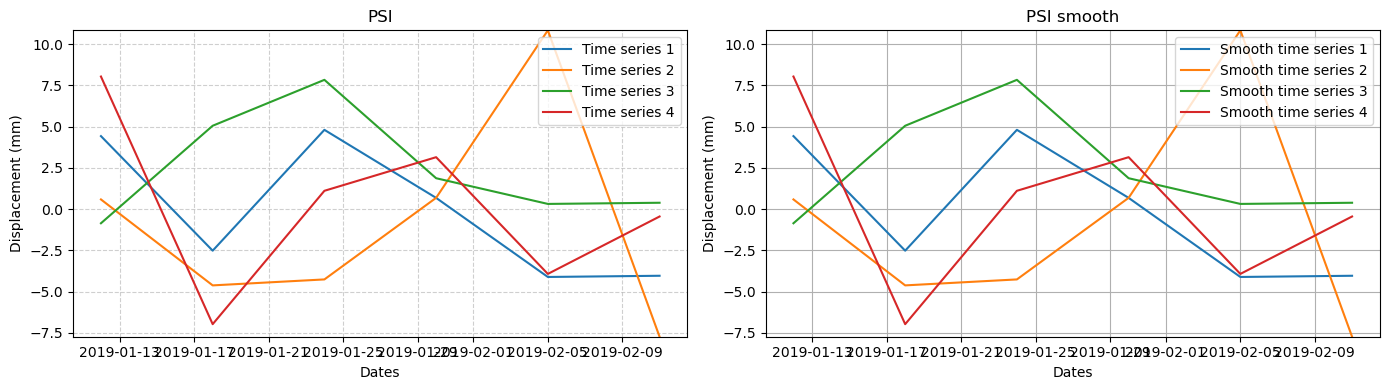

In [55]:
plot_smooth(df_psi, smooth_time_series_psi, 'PSI')

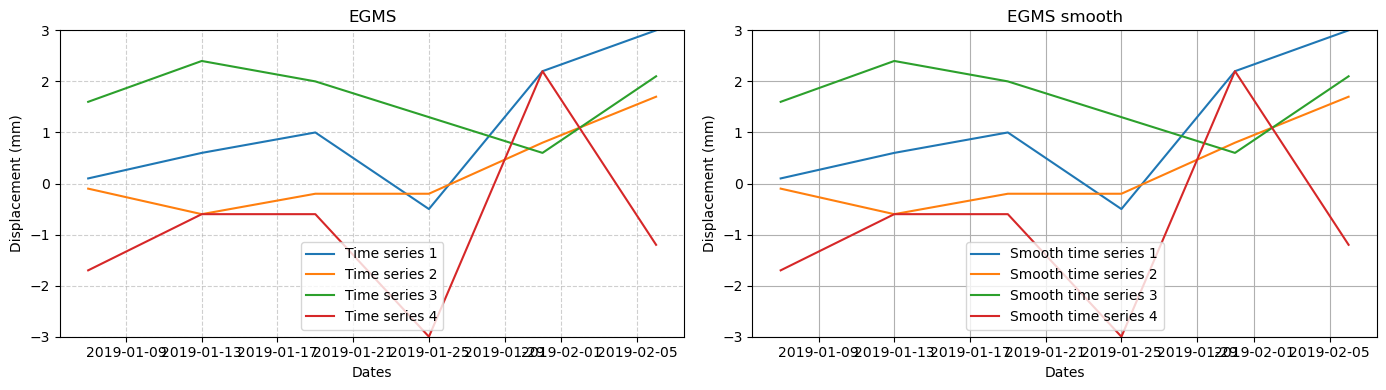

In [56]:
plot_smooth(df_egms, smooth_time_series_egms, 'EGMS')

Since we see a peak in every Fourier Transform in the first inverval that corresponds with the sesonality, we can just remove it from the smooth time series in order to get rid of the noise and seasonality and get the deformation caused by different natural/artificial processes.

In [57]:
deformation_time_series_psi = []

for i, smooth_time_series in enumerate(smooth_time_series_psi):
    deformation_time_series_psi_i = smooth_time_series - psi_psi[i][0]
    deformation_time_series_psi.append(deformation_time_series_psi_i)

deformation_time_series_egms = []

for i, smooth_time_series in enumerate(smooth_time_series_egms):
    deformation_time_series_egms_i = smooth_time_series - psi_egms[i][0]
    deformation_time_series_egms.append(deformation_time_series_egms_i)

In [58]:
def plot_deformation(smooth, deformation, title) -> None:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # Smooth
    for i, smooth_time_series in enumerate(smooth):
        axes[0].plot(df.index, smooth_time_series, label=f"Smooth time series {i + 1}")

    axes[0].set_title(f'{title} smooth')
    axes[0].set_xlabel('Dates')
    axes[0].set_ylabel('Displacement (mm)')
    axes[0].grid(True)
    axes[0].legend()

    # Deformation
    for i, deformation_time_series in enumerate(deformation):
        axes[1].plot(df.index, deformation_time_series, label=f"Deformation time series {i + 1}")

    axes[1].set_title(f'{title} deformation')
    axes[1].set_xlabel('Dates')
    axes[1].set_ylabel('Displacement (mm)')
    axes[1].grid(True)
    axes[1].legend()

    # Scale
    all_series =  smooth + deformation
    y_min = min([series.min() for series in all_series])
    y_max = max([series.max() for series in all_series])

    axes[0].set_ylim(y_min, y_max)
    axes[1].set_ylim(y_min, y_max)

    plt.tight_layout()
    plt.show()

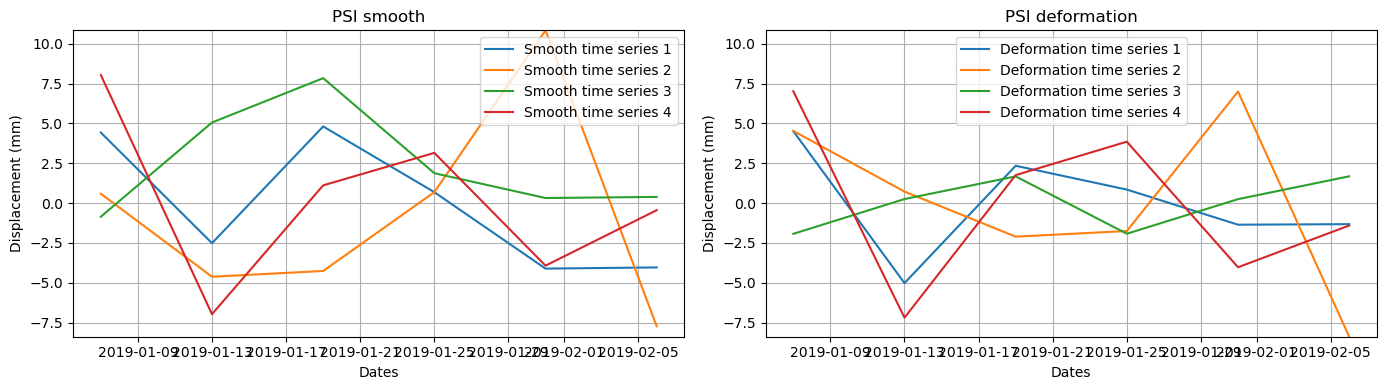

In [59]:
plot_deformation(smooth_time_series_psi, deformation_time_series_psi, 'PSI')

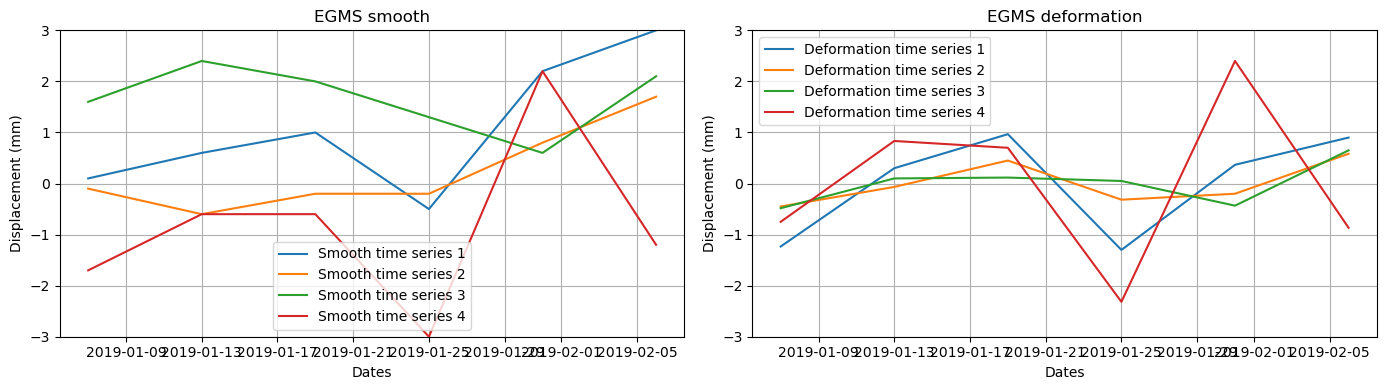

In [60]:
plot_deformation(smooth_time_series_egms, deformation_time_series_egms, 'EGMS')